<a href="https://colab.research.google.com/github/Viny2030/UMSA-Analisis_de_datos/blob/main/pd_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

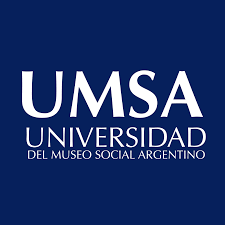

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/250px-Pandas_logo.svg.png)

**En este cuaderno continuamos con el desarrollo de los temás más usuales y utilizados del módulo Pandas...**

https://pandas.pydata.org/docs/user_guide/index.html

***Las estructuras de datos de Pandas nos proporcionan un formato para organizar, administrar y almacenar datos. El conocimiento de estas estructuras de datos (series, dataframe y paneles de datos) resultará útil cuando se busque solucionar problemas o realizar distintas operaciones en los datos. Las estructuras de datos de Pandas son diferentes de las estructuras de datos de Python (tuplas, listas y diccionarios) por una simple razón: las estructuras de datos de Pandas fueron creadas para tareas de análisis de datos.***

# **Carga de módulos necesarios**

In [1]:
import pandas as pd
import numpy as np

# **Obtención de datos**

In [2]:
datos = "https://raw.githubusercontent.com/Viny2030/UMSA-Analisis_de_datos/refs/heads/main/Analisis_de_Facturas_de_Venta.csv"

In [3]:
df = pd.read_csv(datos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DOCUMENTO              159 non-null    object 
 1   ORGANIZACION           159 non-null    object 
 2   FECHA                  159 non-null    object 
 3   TIPOFACTURA            159 non-null    object 
 4   PRODUCTO               159 non-null    object 
 5   CANTIDAD               159 non-null    float64
 6   PRECIO                 159 non-null    float64
 7   IMPORTEMONTRANSACCION  159 non-null    float64
 8   MONEDA                 159 non-null    object 
dtypes: float64(3), object(6)
memory usage: 11.3+ KB


***Podemos observar que, como el tipo de datos de la fecha no es el que corresponde...***

In [4]:
df["FECHA"] = pd.to_datetime(df.FECHA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DOCUMENTO              159 non-null    object        
 1   ORGANIZACION           159 non-null    object        
 2   FECHA                  159 non-null    datetime64[ns]
 3   TIPOFACTURA            159 non-null    object        
 4   PRODUCTO               159 non-null    object        
 5   CANTIDAD               159 non-null    float64       
 6   PRECIO                 159 non-null    float64       
 7   IMPORTEMONTRANSACCION  159 non-null    float64       
 8   MONEDA                 159 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 11.3+ KB


<ipython-input-4-ab26d8cf635d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["FECHA"] = pd.to_datetime(df.FECHA)


In [5]:
print(f"Nuestro dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas")

Nuestro dataframe tiene 159 filas y 9 columnas


# **Selección de datos...**

## **Selección por etiquetas**

***Pandas proporciona un conjunto de métodos para tener una indexación basada en etiquetas. Este es un protocolo estricto basado en la inclusión. Cada etiqueta solicitada debe existir, tanto en el index como en las columnas. Al seleccionar por ejemplo filas (index) se incluye el límite inicial indicado y el límite final. Los números enteros son etiquetas válidas, pero se refieren a las etiquetas del index (cuando la etiqueta es numérica) y no a la posición de la fila.***

**En los parámetros de la selección, siempre se indica primero las filas y luego las columnas.. En el caso de seleccionar de un DataFrame, se hace de la siguiente forma:**

~~~python
df.loc[fila inicial : fila final, columna inicial : columna final]
~~~


***Seleccionando tres filas, desde la fila 0 hasta la fila 2...***

In [6]:
df.loc[0:2]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos


***Seleccionando cuatro filas, desde la fila 2 hasta la fila 5...***

In [7]:
df.loc[2:5]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0,59700.0,Pesos Argentinos
3,A-0001-00000230,Amazon Group,2019-06-12,Factura,Mercaderia de Reventa,30.0,10358.0,310740.0,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50.0,6300.0,315000.0,Pesos Argentinos
5,A-0001-00000228,Galardon S.A.,2019-11-17,Factura,Impresora Multifuncion,23.0,10209.0,234807.0,Pesos Argentinos


In [8]:
df.loc[2:5,]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0,59700.0,Pesos Argentinos
3,A-0001-00000230,Amazon Group,2019-06-12,Factura,Mercaderia de Reventa,30.0,10358.0,310740.0,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50.0,6300.0,315000.0,Pesos Argentinos
5,A-0001-00000228,Galardon S.A.,2019-11-17,Factura,Impresora Multifuncion,23.0,10209.0,234807.0,Pesos Argentinos


In [9]:
df.loc[2:5,:]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0,59700.0,Pesos Argentinos
3,A-0001-00000230,Amazon Group,2019-06-12,Factura,Mercaderia de Reventa,30.0,10358.0,310740.0,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50.0,6300.0,315000.0,Pesos Argentinos
5,A-0001-00000228,Galardon S.A.,2019-11-17,Factura,Impresora Multifuncion,23.0,10209.0,234807.0,Pesos Argentinos


In [10]:
df.loc[2:5,"DOCUMENTO":"CANTIDAD"]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0
3,A-0001-00000230,Amazon Group,2019-06-12,Factura,Mercaderia de Reventa,30.0
4,A-0001-00000229,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50.0
5,A-0001-00000228,Galardon S.A.,2019-11-17,Factura,Impresora Multifuncion,23.0


***Seleccionando dos columnas, TIPOFACTURA y FECHA...***

In [ ]:
df.loc[:,["TIPOFACTURA","FECHA"]]

,TIPOFACTURA,FECHA
0,Factura,2019-12-27
1,Factura,2019-12-21
2,Factura,2019-10-12
3,Factura,2019-06-12
4,Factura,2019-11-20
...,...,...
154,Factura,2018-01-31
155,Factura,2018-01-25
156,Factura,2018-01-25
157,Factura,2018-01-01


**Seleccionando filas y columnas**

In [11]:
df.loc[7:9,["FECHA","TIPOFACTURA"]]

,FECHA,TIPOFACTURA
7,2019-10-15,Factura
8,2019-02-10,Factura
9,2019-09-30,Factura


In [12]:
df.loc[[7,9],["FECHA","TIPOFACTURA"]]

,FECHA,TIPOFACTURA
7,2019-10-15,Factura
9,2019-09-30,Factura


In [13]:
df.loc[[7,9,8],["FECHA","TIPOFACTURA"]]

,FECHA,TIPOFACTURA
7,2019-10-15,Factura
9,2019-09-30,Factura
8,2019-02-10,Factura


In [14]:
df.loc[:,["FECHA","TIPOFACTURA"]].head()

,FECHA,TIPOFACTURA
0,2019-12-27,Factura
1,2019-12-21,Factura
2,2019-10-12,Factura
3,2019-06-12,Factura
4,2019-11-20,Factura


## **Selección por posición**

***Pandas proporciona un conjunto de métodos para obtener una indexación puramente basada en enteros. La semántica sigue de cerca lo definido en Python y NumPy. Estos son indexación. Al cortar, se incluye el límite inicial $n$, mientras que se excluye el límite final $m$, es decir desde $n$ hasta $m-1$***

**En los parámetros de la selección, siempre se indica primero las filas y luego las columnas. En el caso de seleccionar de un DataFrame, se hace de la siguiente forma:**

~~~python
df.loc[fila posición inicial : fila posición final, columna posición inicial : columna posición final]
~~~

**Selección por ubicación del dato**

In [15]:
df.iloc[6]

,6
DOCUMENTO,A-0001-00000227
ORGANIZACION,Klarkson
FECHA,2019-02-11 00:00:00
TIPOFACTURA,Factura
PRODUCTO,Cable RGB para video
CANTIDAD,60.0
PRECIO,1030.5
IMPORTEMONTRANSACCION,61830.0
MONEDA,Pesos Argentinos


In [16]:
df.iloc[3:5,0:2]

,DOCUMENTO,ORGANIZACION
3,A-0001-00000230,Amazon Group
4,A-0001-00000229,Manganello S.R.L


***También se pueden presentar las posiciones de las filas y de las columnas como una lista...***

In [17]:
df.iloc[[0,2,4],[0,2,3]]

,DOCUMENTO,FECHA,TIPOFACTURA
0,B-0001-00000102,2019-12-27,Factura
2,A-0001-00000231,2019-10-12,Factura
4,A-0001-00000229,2019-11-20,Factura


In [18]:
df.iloc[[1,2,4],[0,2]]

,DOCUMENTO,FECHA
1,B-0001-00000101,2019-12-21
2,A-0001-00000231,2019-10-12
4,A-0001-00000229,2019-11-20


## **Encadenamiento**

**Con esta forma de seleccionar datos, primero se deben elegir los nombres de las columnas deseadas y luego el rango de filas a mostrar...**

In [19]:
df[["DOCUMENTO", "FECHA"]][0:4]

,DOCUMENTO,FECHA
0,B-0001-00000102,2019-12-27
1,B-0001-00000101,2019-12-21
2,A-0001-00000231,2019-10-12
3,A-0001-00000230,2019-06-12


In [20]:
df[["FECHA", "PRODUCTO", "PRECIO", "DOCUMENTO"]][0:10]

,FECHA,PRODUCTO,PRECIO,DOCUMENTO
0,2019-12-27,Consultoria Web,5785.1240,B-0001-00000102
1,2019-12-21,Honorarios,99586.7769,B-0001-00000101
2,2019-10-12,Parlantes para PC,1990.0000,A-0001-00000231
3,2019-06-12,Mercaderia de Reventa,10358.0000,A-0001-00000230
4,2019-11-20,Consultoria Web,6300.0000,A-0001-00000229
5,2019-11-17,Impresora Multifuncion,10209.0000,A-0001-00000228
6,2019-02-11,Cable RGB para video,1030.5000,A-0001-00000227
7,2019-10-15,Mercaderia de Reventa,12354.0000,A-0001-00000226
8,2019-02-10,Insumos oficina,7785.0000,A-0001-00000225
9,2019-09-30,Servicios Profesionales,6700.0000,A-0001-00000224


## **Filtros**

**Podemos llevar a cabo algunas opciones para filtrar nuestros datos, incluidas las máscaras booleanas y algunos métodos especiales. Con las máscaras booleanas, probamos nuestros datos contra algún valor y obtenemos una estructura de la misma forma, excepto que está llena de valores que son True o False.**

In [21]:
df.head(3)

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos


### **<font color="RoyalBlue"> Mayor ```>``` Mayor igual ```>=``` Menor ```<``` Menor igual ```<=```</font>**

**Filtrando los datos para valores de PRECIO mayores a $100000$, en este caso, se muestra la serie PRECIO con datos booleanos que cumplen la condición...**

In [22]:
df.PRECIO > 100000

,PRECIO
0,False
1,False
2,False
3,False
4,False
...,...
154,False
155,False
156,False
157,False


**Si lo que se quiere es ver el resultante de la condición en todo el DataFrame, entonces...**

In [23]:
df[df.PRECIO > 100000]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
13,A-0001-00000220,Hernandez S.A.,2019-02-09,Factura,Publicidad y Marketing,1.0,105060.0,105060.0,Pesos Argentinos
52,A-0001-00000194,Horizonte S.A.,2019-02-28,Factura,Honorarios,1.0,150000.0,150000.0,Pesos Argentinos
54,A-0001-00000192,Manganello S.R.L,2019-02-24,Factura,Servicios Profesionales,1.0,105500.0,105500.0,Pesos Argentinos
70,A-0001-00000179,Jameson SRL,2018-04-12,Factura,Honorarios,1.0,165980.0,165980.0,Pesos Argentinos


### **<font color="RoyalBlue">Dos o mas condiciones verdaderas ```&```</font>**

**Para visualizar más de dos condiciones verdaderas, es decir todas las condiciones verdaderas se usa el símbolo &...**

In [24]:
df.loc[(df.CANTIDAD == 1) & (df.PRECIO > 110000)]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
52,A-0001-00000194,Horizonte S.A.,2019-02-28,Factura,Honorarios,1.0,150000.0,150000.0,Pesos Argentinos
70,A-0001-00000179,Jameson SRL,2018-04-12,Factura,Honorarios,1.0,165980.0,165980.0,Pesos Argentinos


### **<font color="RoyalBlue">Dos o mas condiciones, alguna verdadera ```|```</font>**

**Para visualizar más de dos condiciones y alguna de ellas es verdadera, se usa el símbolo |**

In [25]:
df.loc[(df.CANTIDAD > 50) | (df.PRECIO > 110000)]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
6,A-0001-00000227,Klarkson,2019-02-11,Factura,Cable RGB para video,60.0,1030.5,61830.0,Pesos Argentinos
52,A-0001-00000194,Horizonte S.A.,2019-02-28,Factura,Honorarios,1.0,150000.0,150000.0,Pesos Argentinos
70,A-0001-00000179,Jameson SRL,2018-04-12,Factura,Honorarios,1.0,165980.0,165980.0,Pesos Argentinos


### **<font color="RoyalBlue">Conjunto de valores ```between()```</font>**

**Para un conjunto de valores entre un intervalo determinado...**

In [26]:
df.loc[df.PRECIO.between(100000, 150000)]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
13,A-0001-00000220,Hernandez S.A.,2019-02-09,Factura,Publicidad y Marketing,1.0,105060.0,105060.0,Pesos Argentinos
52,A-0001-00000194,Horizonte S.A.,2019-02-28,Factura,Honorarios,1.0,150000.0,150000.0,Pesos Argentinos
54,A-0001-00000192,Manganello S.R.L,2019-02-24,Factura,Servicios Profesionales,1.0,105500.0,105500.0,Pesos Argentinos
140,B-0001-00000072,Etigand S.A.,2018-04-29,Factura,Consultoria Web,1.0,100000.0,100000.0,Pesos Argentinos


### **<font color="RoyalBlue">Combinaciones de filtros</font>**

In [27]:
df.loc[df.PRECIO.between(10000, 110000) & df.CANTIDAD.between(1, 30)]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
3,A-0001-00000230,Amazon Group,2019-06-12,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
5,A-0001-00000228,Galardon S.A.,2019-11-17,Factura,Impresora Multifuncion,23.0,10209.0000,234807.00,Pesos Argentinos
7,A-0001-00000226,Juan Fernández,2019-10-15,Factura,Mercaderia de Reventa,30.0,12354.0000,370620.00,Pesos Argentinos
10,A-0001-00000223,Manganello S.R.L,2019-09-22,Factura,Televisor Led Samsung 32 Hd Con Soporte Y Con...,6.0,40600.0000,243600.00,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
145,B-0001-00000071,Javier Moroni,2018-03-14,Factura,Publicidad y Marketing,1.0,53719.0083,53719.01,Pesos Argentinos
146,A-0001-00000134,Galardon S.A.,2018-08-03,Factura,Honorarios,1.0,65000.0000,65000.00,Pesos Argentinos
147,A-0001-00000133,Donadelli S.R.L,2018-01-03,Factura,Publicidad y Marketing,1.0,65000.0000,65000.00,Pesos Argentinos
148,A-0001-00000132,Jameson SRL,2018-02-28,Factura,Dise–o Web,1.0,15500.0000,15500.00,Pesos Argentinos


In [28]:
df.loc[df.PRECIO.between(10000, 50000) | df.CANTIDAD.between(1, 4)]

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
3,A-0001-00000230,Amazon Group,2019-06-12,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
5,A-0001-00000228,Galardon S.A.,2019-11-17,Factura,Impresora Multifuncion,23.0,10209.0000,234807.00,Pesos Argentinos
7,A-0001-00000226,Juan Fernández,2019-10-15,Factura,Mercaderia de Reventa,30.0,12354.0000,370620.00,Pesos Argentinos
9,A-0001-00000224,Amazon Group,2019-09-30,Factura,Servicios Profesionales,1.0,6700.0000,6700.00,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
147,A-0001-00000133,Donadelli S.R.L,2018-01-03,Factura,Publicidad y Marketing,1.0,65000.0000,65000.00,Pesos Argentinos
148,A-0001-00000132,Jameson SRL,2018-02-28,Factura,Dise–o Web,1.0,15500.0000,15500.00,Pesos Argentinos
150,A-0001-00000131,Ignition S.A.C.I,2018-02-21,Factura,Consultoria Web,1.0,2500.0000,2500.00,Pesos Argentinos
151,A-0001-00000130,Horizonte S.A.,2018-02-15,Factura,Consultoria Web,1.0,25800.0000,25800.00,Pesos Argentinos


# **Sumando y eliminando datos**

**Muy rara vez se obtendrán datos donde no se quiera agregar ni eliminar algo.**

In [29]:
df.head(3)

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos


## **Creando columnas**

**Se puede agregar una columna al final de las existentes en el DataFrame, de la siguiente manera...**

In [30]:
df["PROVINCIA"] = "Mendoza"
df.head(3)

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA,PROVINCIA
0,B-0001-00000102,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos,Mendoza
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos,Mendoza
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos,Mendoza


In [31]:
df["NACIONAL"] = df.MONEDA == "Pesos Argentinos"
df.head(3)

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA,PROVINCIA,NACIONAL
0,B-0001-00000102,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos,Mendoza,True
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos,Mendoza,True
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos,Mendoza,True


**También se puede seleccionar la ubicación de la columna a crear, de la siguiente forma...**

In [32]:
df.insert(7, column="TRANSACCION", value=df.CANTIDAD * df.PRECIO)

In [33]:
df.head(3)

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,TRANSACCION,IMPORTEMONTRANSACCION,MONEDA,PROVINCIA,NACIONAL
0,B-0001-00000102,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.2000,289256.20,Pesos Argentinos,Mendoza,True
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.7769,99586.78,Pesos Argentinos,Mendoza,True
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.0000,59700.00,Pesos Argentinos,Mendoza,True


## **Eliminando columnas**

In [34]:
df.drop(columns="IMPORTEMONTRANSACCION", inplace=True)

In [35]:
df.head(3)

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,TRANSACCION,MONEDA,PROVINCIA,NACIONAL
0,B-0001-00000102,Etigand S.A.,2019-12-27,Factura,Consultoria Web,50.0,5785.1240,289256.2000,Pesos Argentinos,Mendoza,True
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1.0,99586.7769,99586.7769,Pesos Argentinos,Mendoza,True
2,A-0001-00000231,Amazon Group,2019-10-12,Factura,Parlantes para PC,30.0,1990.0000,59700.0000,Pesos Argentinos,Mendoza,True


**Hemos llegado al fin de este cuaderno, felicitaciones seguimos con Pandas, ahora a seguir en el proximo cuaderno...**